# Module 5: Data Cleaning 

## Introduction
In this module, we will focus on understanding and manipulating categorical variables, which are a common type of data in many datasets. Categorical variables represent types or categories that may or may not have a logical order. We will also explore various strategies for handling missing data, which is crucial for maintaining the integrity of your analysis.

## Objectives
- **Understanding Categorical Variables**: Learn what categorical variables are, how they differ from numerical variables, and why they are important in data science.
- **Handling Missing Data**: Understand the impact of missing data on analyses and learn multiple strategies to impute or handle missing values effectively.

### 1. Categorical Variables
Categorical variables are often used to represent groups or categories. They can be:
- **Nominal**: No natural ordering (e.g., colors, types of cars).
- **Ordinal**: Natural ordering exists (e.g., class levels, ratings).

#### Visualization Techniques:
- Bar charts for nominal data.
- Line graphs or bar charts for ordinal data, where order matters.

#### Manipulation Techniques:
- **One-hot encoding**: Convert categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.
- **Label encoding**: Assign a unique label to each class of the category.

### 2. Handling Missing Values
Missing data can significantly impact the quality of predictions. Techniques to handle missing values include:
- **Deletion**: Remove rows with missing values, which is effective if the number of these rows is insignificant.
- **Imputation**:
  - **Mean/Median/Mode Imputation**: Replace missing values with the mean, median, or mode.
  - **Prediction Models**: Use a machine learning model to predict and fill in missing values based on other available data.
  - **K-Nearest Neighbors (KNN)**: Impute values based on the K-nearest neighbors.
  - **Iterative Imputation**: Model each feature with missing values as a function of other features in a round-robin fashion.

## Practical Exercise (TP)
- **Dataset**: Use a modified Titanic dataset with additional manipulated missing values and categorical features.
- **Tasks**:
  - Visualize different types of categorical data from the Titanic dataset.
  - Apply one-hot encoding and label encoding to convert categorical data into numerical data.
  - Perform different techniques of missing value imputation and compare their impacts on model performance.

## Expected Outcomes
By the end of this module, participants will:
- Be adept at identifying and manipulating categorical data.
- Understand various methods to handle missing data and apply these techniques in practice.
- Be able to improve data quality, which is crucial for building robust predictive models.

This module aims to provide hands-on experience with real-world data, bridging the gap between theoretical knowledge and practical application in feature engineering.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Collection

In [30]:
df1 =  pd.read_csv("weather_2016_2020_daily.csv", sep=",")

In [33]:
df1.columns

Index(['Date', 'Day', 'Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg',
       'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg',
       'Wind_min', 'Press_max', 'Press_avg', 'Press_min', 'Precipit',
       'day_of_week'],
      dtype='object')

In [41]:
df1

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2020-08-26,26,95,83.4,79,79,75.7,73,94,78.2,54,21,12.4,8,29.7,29.7,29.6,0.01,2
1548,2020-08-27,27,99,87.1,78,75,72.0,69,82,62.7,39,14,8.0,0,29.7,29.6,29.5,0.00,3
1549,2020-08-28,28,98,86.5,79,79,77.2,74,94,75.6,49,18,8.1,0,29.8,29.7,29.7,0.00,4
1550,2020-08-29,29,98,87.5,79,79,75.8,72,94,70.4,43,15,6.5,0,29.8,29.7,29.7,0.22,5


In [31]:
df2 = pd.read_csv("power_usage_2016_to_2020.csv", sep=",")

In [44]:
df2["Date"] = df2['StartDate'].apply(lambda x: x[:10])

In [34]:
df2.columns

Index(['StartDate', 'Value (kWh)', 'day_of_week', 'notes'], dtype='object')

In [47]:
df2

,StartDate,Value (kWh),day_of_week,notes,Date
0,2016-01-06 00:00:00,1.057,2,weekday,2016-01-06
1,2016-01-06 01:00:00,1.171,2,weekday,2016-01-06
2,2016-01-06 02:00:00,0.560,2,weekday,2016-01-06
3,2016-01-06 03:00:00,0.828,2,weekday,2016-01-06
4,2016-01-06 04:00:00,0.932,2,weekday,2016-01-06
...,...,...,...,...,...
35947,2020-07-07 19:00:00,1.307,1,weekday,2020-07-07
35948,2020-07-07 20:00:00,2.872,1,weekday,2020-07-07
35949,2020-07-07 21:00:00,2.138,1,weekday,2020-07-07
35950,2020-07-07 22:00:00,2.199,1,weekday,2020-07-07


In [45]:
df = pd.merge(df1, df2, on="Date")

In [46]:
df

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,...,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_x,StartDate,Value (kWh),day_of_week_y,notes
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,...,0,29.8,29.8,29.7,0.0,2,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,...,0,29.8,29.8,29.7,0.0,2,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,...,0,29.8,29.8,29.7,0.0,2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,...,0,29.8,29.8,29.7,0.0,2,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,...,0,29.8,29.8,29.7,0.0,2,2016-01-06 04:00:00,0.932,2,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,2020-07-07,7,93,84.5,80,80,76.0,72,91,76.6,...,0,29.9,29.8,29.8,0.0,1,2020-07-07 19:00:00,1.307,1,weekday
35948,2020-07-07,7,93,84.5,80,80,76.0,72,91,76.6,...,0,29.9,29.8,29.8,0.0,1,2020-07-07 20:00:00,2.872,1,weekday
35949,2020-07-07,7,93,84.5,80,80,76.0,72,91,76.6,...,0,29.9,29.8,29.8,0.0,1,2020-07-07 21:00:00,2.138,1,weekday
35950,2020-07-07,7,93,84.5,80,80,76.0,72,91,76.6,...,0,29.9,29.8,29.8,0.0,1,2020-07-07 22:00:00,2.199,1,weekday


In [22]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
df = df.drop("day_of_week", axis=1)

In [17]:
df = df.set_index('Date')

In [18]:
# Preparing the data
y = df['Precipit']
X = df.iloc[:,:-1]

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize and train the Logistic Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
mean_squared_error(y_pred, y_test)

0.5506970741155823

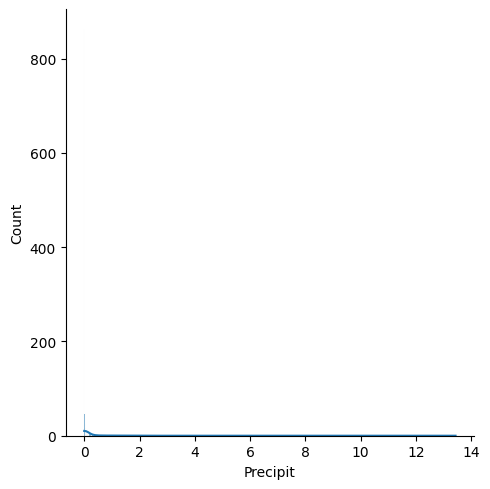

In [28]:
sns.displot(y_train, kde=True)